In [1]:
import numpy as np
from math import sqrt
from scipy.integrate import odeint
import matplotlib.pyplot as plt


1.1383159128225102
0.5375391050230445
0.10344525244863183
0.04405071452202314
0.017988602483420865
0.007223393018563321
0.002882566847921971
0.001147389839199995
0.00045628678816534183
0.00018145033610227526
7.206684345978136e-05


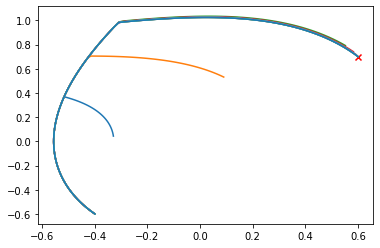

In [75]:
u1_0 = 1
ksis1 = np.array([0.7, 0.8])
a = 0.05

def u1(t):
    distance = np.cumsum(ksis1) - t
    distance[distance < 0] = np.inf
    return u1_0 * (-1) ** np.argmin(distance)

x0 = np.array([-0.4, -0.6])
xt = np.array([0.6, 0.7])

def f1(x, t):
    x1, x2 = x
    dx1 = x2
    dx2 = - x1 - (x1 ** 2 - 1) * x2 + u1(t)
    return [dx1, dx2]

t1max = ksis1.sum()
t1 = np.linspace(0, t1max, 100)
result = odeint(f1, x0, t1)
plt.plot(result[:,0], result[:,1])
plt.scatter(xt[0],xt[1], marker='x', c='r')
distance = np.linalg.norm(result[-1, :] - xt)
print(distance)

for i in range(100):
    t_init_j = 0
    x_init_j = np.array(f1(x0, t_init_j))
    dx_dksi = []
    for j in range(len(ksis1)):
        tj = np.linspace(t_init_j, t1max, 100)
        # print(tj)
        def dx_j_dksi_system(dx_dksi, t):
            index_t = (np.abs(t1 - t)).argmin()
            return np.array([[0, 1], [-1-2*result[index_t,0] * result[index_t,1], -result[index_t,0] ** 2 + 1]]) @ dx_dksi
        result_derivative = odeint(dx_j_dksi_system, x_init_j, tj)
        if j != 0:
            dx_dksi.append(result_derivative[-1])
        t_init_j = t_init_j + ksis1[j]
        x_init_j = np.array(f1(result[(np.abs(t1 - t_init_j)).argmin()], t_init_j))
    dx_dksi.append(x_init_j)
    dx_dksi = np.array(dx_dksi)
    # print(dx_dksi)
    gradient = (result[-1, 0] - xt[0]) * dx_dksi[:,0] + (result[-1, 1] - xt[1]) * dx_dksi[:, 1]
    # print(gradient)
    # raise EOFError
    # gradient = gradient / distance
    ksis1 = ksis1 - a * gradient

    t1max = ksis1.sum()
    t1 = np.linspace(0, t1max, 100)
    result = odeint(f1, x0, t1)
    distance = np.linalg.norm(result[-1, :] - xt)
    if i % 10 == 0:
        plt.plot(result[:,0], result[:,1])
        print(distance)


5.610373583269345
4.762782767454909
1.303128933272021
0.5177187857539837
0.4771173012077456
0.39160404849301034
0.37557854994233647
0.36505909939253806
0.2840352811831563
0.29795352139002695
0.3037037279079669
0.3017084989912987
0.20745407831178975
0.20752665260005143
0.21843138398714013
0.20042116982831223
0.18046689794508297
0.19669944389114702
0.1829836120255998
0.15122355537314278
0.14381393341561374
0.16700071574823414
0.15779190826582518
0.1709360105938189
0.16773960095241636
0.15118313046595103
0.16181078024776632
0.1479808676099008
0.15711775077103513
0.15293488558138474
0.15008631643142104
0.14217941669989514
0.13290675494942597
0.1423632595490476
0.13970148719927278
0.12484384515848321
0.127241765734201
0.13130224811995242
0.1283433865292075
0.12194625192012014
0.11690573305364756
0.10231761882222015
0.0946213666963871
0.10089089605607643
0.10747390756105828
0.11126456797171866
0.10909089077128946
0.10002920659154098
0.0811053916757351
0.0885568978443004
0.08491490952531758
0

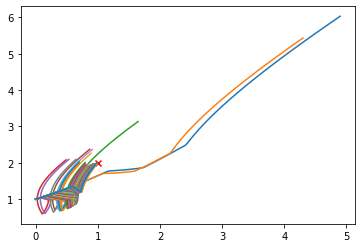

In [101]:
u1_0 = 1
u2_0 = 1
ksis1 = np.array([0.7, 1.4])
ksis2 = np.array([0.5, 0.8, 0.8])

def calculate_etas(ksis1, ksis2):
    ksis1_sum = np.cumsum(ksis1)
    ksis2_sum = np.cumsum(ksis2)
    etas_sum = np.concatenate([ksis1_sum, ksis2_sum])
    etas_sum.sort()
    etas = np.concatenate([[etas_sum[0]],etas_sum[1:] - etas_sum[:-1]])
    return etas[:-1]

etas = calculate_etas(ksis1, ksis2)
a = 0.05

def u1(t):
    distance = np.cumsum(ksis1) - t
    distance[distance < 0] = np.inf
    return u1_0 * (-1) ** np.argmin(distance)

def u2(t):
    distance = np.cumsum(ksis2) - t
    distance[distance < 0] = np.inf
    return u2_0 * (-1) ** np.argmin(distance)

x0 = np.array([0, 1])
xt = np.array([1, 2])

def f2(x, t):
    x1, x2 = x
    dx1 = x2 + u1(t)
    dx2 = x1 + u2(t)
    return np.array([dx1, dx2])

tmax = (ksis1.sum() + ksis2.sum())/2
t = np.linspace(0, tmax, 100)
result = odeint(f2, x0, t)
plt.plot(result[:,0], result[:,1])
plt.scatter(xt[0],xt[1], marker='x', c='r')
print(np.linalg.norm(result[-1, :] - xt))

for i in range(1000):
    t_init_j = 0
    x_init_j = f2(x0, t_init_j)
    dx_deta = []
    for j in range(len(etas)):
        tj = np.linspace(t_init_j, tmax, 100)
        def dx_j_deta_system(dx_deta, t):
            return np.array([[0, 1], [1,0]]) @ dx_deta
        result_derivative = odeint(dx_j_deta_system, x_init_j, tj)
        if j != 0:
            dx_deta.append(result_derivative[-1])
        t_init_j = t_init_j + etas[j]
        x_init_j = f2(result[(np.abs(t - t_init_j)).argmin()], t_init_j)
    dx_deta.append(x_init_j)
    dx_deta = np.array(dx_deta)

    eta_to_ksi_matrix = np.zeros((len(etas), len(etas)))
    ksis1_sum = np.cumsum(ksis1)
    ksis2_sum = np.cumsum(ksis2)
    etas_sum = np.concatenate([ksis1_sum, ksis2_sum])
    etas_sum.sort()
    etas_sum = etas_sum[:-1]
    for j, value in enumerate(ksis1_sum):
        eta_index = np.where(etas_sum == value)[0]
        if len(eta_index) == 0:
            eta_index = len(etas_sum) - 1
        elif len(eta_index) > 1:
            if all(eta_to_ksi_matrix[eta_index[0]] == 0):
                eta_index = eta_index[0]
            else:
                eta_index = eta_index[1]
        distance = ksis2_sum - value
        distance[distance < 0] = np.inf
        ksi2_index = np.argmin(distance)
        row = np.zeros(len(etas))
        row[:j+1] = 1
        row[len(ksis1):len(ksis1)+ksi2_index] = -1
        eta_to_ksi_matrix[eta_index] = row
    for j, value in enumerate(ksis2_sum[:-1]):
        eta_index = np.where(etas_sum == value)[0]
        if len(eta_index) == 0:
            eta_index = len(etas_sum) - 1
        elif len(eta_index) > 1:
            if all(eta_to_ksi_matrix[eta_index[0]] == 0):
                eta_index = eta_index[0]
            else:
                eta_index = eta_index[1]
        distance = ksis1_sum - value
        distance[distance < 0] = np.inf
        ksi1_index = np.argmin(distance)
        row = np.zeros(len(etas))
        row[len(ksis1): len(ksis1) + j + 1 ] = 1
        row[:ksi1_index] = -1
        eta_to_ksi_matrix[eta_index] = row
    dx_dksi = np.linalg.solve(eta_to_ksi_matrix, dx_deta)
    gradient_1 = (result[-1, 0] - xt[0]) * dx_dksi[:len(ksis1),0] + (result[-1, 1] - xt[1]) * dx_dksi[:len(ksis1), 1]
    gradient_2 = (result[-1, 0] - xt[0]) * dx_dksi[len(ksis1):,0] + (result[-1, 1] - xt[1]) * dx_dksi[len(ksis1):, 1]
    gradient_2 = np.concatenate([gradient_2, [gradient_1[-1]]])
    ksis1 = ksis1 - a * gradient_1 / max(np.linalg.norm(gradient_1),1)
    ksis2 = ksis2 - a * gradient_2 / max(np.linalg.norm(gradient_2),1)

    ksis1 = ksis1[ksis1 > 0]
    ksis2 = ksis2[ksis2 > 0]
    # ksis1[ksis1 < 0] = 0
    # ksis2[ksis2 < 0] = 0
    etas = calculate_etas(ksis1, ksis2)

    tmax = (ksis1.sum() + ksis2.sum()) / 2
    t = np.linspace(0, tmax, 100)
    result = odeint(f2, x0, t)
    if i % 10 == 0:
        plt.plot(result[:,0], result[:,1])
        print(np.linalg.norm(result[-1, :] - xt))


325.90648318152597
124.73379223999713
94.13218810139527
72.97181606781578
56.53471253270982
8.360903095322758
4.833360932509722
3.797912641657687
3.6014214057419345
3.6107437543824488
3.645074419899796
3.667107853602435
3.674557137297358
3.671369629404403
3.6615241451515206
3.6476923026563686
3.6315954584879617
3.6142251442045956
3.5961789779426514
3.5778677103649446
3.5594070551793364
3.5409770514157346
3.5225579624295613
3.5043074076390806
3.4861813050416126
3.468165742921306
3.4502496391353277


KeyboardInterrupt: 

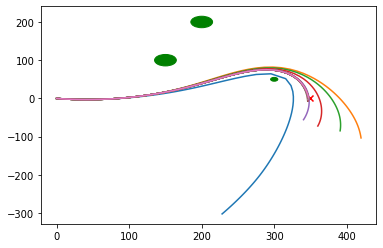

In [110]:
import math


class Planet:
    def __init__(self, mass: float, x: int, y: int, r: int):
        self.mass = mass
        self.x = x
        self.y = y
        self.r = r

    def is_inside(self, x: float, y: float):
        return (x - self.x) ** 2 + (y - self.y) ** 2 < self.r ** 2

    def __str__(self):
        return str(self.mass) + ',' + str(self.x) + ',' + str(self.y) + ',' + str(self.r)


G = 2.61e-3

x0 = np.array([0,0,0.6,-0.1])
xt = np.array([350, 0, 0, 0])
planets = [Planet(50000, 300, 50, 5), Planet(15000, 150, 100, 15), Planet(30000,200, 200, 15)]
ksis = np.array([1.5,1,1,1,1]) * 100
u_0 = 0.002
a = 0.01

def model(y, t, planets: [Planet]):
    posX, posY, vx, vy = y
    degree = math.atan(vy / vx) if vx != 0 else 0
    if any(planet.is_inside(posX, posY) for planet in planets):
        return [0, 0, -vx, -vy]
    dvx = sum(
        G * planet.mass * (planet.x - posX) / (sqrt((posX - planet.x) ** 2 + (posY - planet.y) ** 2)) ** 3 for
        planet in planets) + u(t) * math.cos(degree)
    dvy = sum(
        G * planet.mass * (planet.y - posY) / (sqrt((posX - planet.x) ** 2 + (posY - planet.y) ** 2)) ** 3 for
        planet in planets) + u(t) * math.sin(degree)
    return np.array([vx, vy, dvx, dvy])


def u(t):
     return u_0 * (-1) ** np.argmin(np.abs(np.cumsum(ksis) - t))


tmax = ksis.sum()
time = np.linspace(0, tmax, 100)
result = odeint(model, x0, time, args=(planets,))
plt.plot(result[:,0], result[:,1])
plt.scatter(xt[0],xt[1], marker='x', c='r')
fig = plt.gcf()
ax = fig.gca()
for planet in planets:
    circle = plt.Circle((planet.x, planet.y), planet.r, color='g')
    ax.add_patch(circle)
distance = np.linalg.norm(result[-1, :] - xt)
print(distance)
for i in range(100):
    t_init_j = 0
    x_init_j = model(x0, t_init_j, planets)
    dx_dksi = []
    for j in range(len(ksis)):
        tj = np.linspace(t_init_j, tmax, 100)
        def dx_j_dksi_system(dx_dksi, t):
            index_t = (np.abs(time - t)).argmin()
            x = result[index_t, 0]
            y = result[index_t, 1]
            distances = [((x-p.x) ** 2 + (y - p.y) ** 2) ** (1/2)for p in planets]
            return np.array([[0, 0, 1, 0], [0, 0, 0, 1],
                             [G * sum(p.mass * (1/(distances[i] ** 3) - 3 *(x-p.x) ** 2 / (distances[i] ** 5)) for i, p in enumerate(planets)),
                              -3*G * sum(p.mass * (x-p.x) * (y-p.y) / (distances[i] ** 5) for i, p in enumerate(planets)),
                              0,
                              0],
                             [-3*G * sum(p.mass * (y-p.y) * (x-p.x) / (distances[i] ** 5) for i, p in enumerate(planets)),
                              G * sum(p.mass * (1 / (distances[i] ** 3) - 3 *(y-p.y) ** 2 / (distances[i] ** 5)) for i, p in enumerate(planets)),
                              0,
                              0]
                             ]) @ dx_dksi
        result_derivative = odeint(dx_j_dksi_system, x_init_j, tj)
        if j != 0:
            dx_dksi.append(result_derivative[-1])
        t_init_j = t_init_j + ksis[j]
        x_init_j = model(result[(np.abs(time - t_init_j)).argmin()], t_init_j, planets)
    dx_dksi.append(x_init_j)
    dx_dksi = np.array(dx_dksi)
    gradient = (result[-1, 0] - xt[0]) * dx_dksi[:,0] + (result[-1, 1] - xt[1]) * dx_dksi[:, 1] + (result[-1, 2] - xt[2]) * dx_dksi[:, 2] + (result[-1, 3] - xt[3]) * dx_dksi[:, 3]
    # gradient = gradient / distance
    ksis = ksis - a * gradient
    ksis[ksis < 0] = 0
    # print(ksis)
    tmax = ksis.sum()
    time = np.linspace(0, tmax, 100)
    result = odeint(model, x0, time, args=(planets,))
    distance = np.linalg.norm(result[-1, :] - xt)
    if i % 1 == 0:
        plt.plot(result[:,0], result[:,1])
    print(distance)
    # print(np.linalg.norm((result[-1, :] - xt)[:2]))

